# Registration across Macaque MRI templates

**Authors:** Chris Klink (c.klink@nin.knaw.nl) & Nikoloz Sirmpilatze (niko.sirbiladze@gmail.com)               
**Last updated:** June 17, 2025     

**Requirements:**    
* _python_ >= 3.7
* _nipype_ >= 1.2.0
* _nilearn_ >= 0.5.2
    * Used only for visualisation
* _nibabel_ >= 2.3.3
* _joblib_ >= 0.14.1
    * Used only for parallel processing, not necessary when registrations are done serially
* _ANTs_ >= 2.4.0
    * _antsRegistration_,  _antsApplyTransforms_ and _antsAverageImages_ need to be in your path as executables    

**Citation**: Sirmpilatze, Nikoloz and Klink, P. Christiaan (2020). RheMAP: Non-linear warps between common rhesus macaque brain templates (Version 1.2)[Data set]. Zenodo. https://doi.org/10.5281/zenodo.3786357     

The following templates are used: 
1. [NMT v1.2](https://afni.nimh.nih.gov/pub/dist/doc/htmldoc/nonhuman/macaque_tempatl/template_nmtv1.html)
2. [NMT v1.3](https://afni.nimh.nih.gov/pub/dist/doc/htmldoc/nonhuman/macaque_tempatl/template_nmtv1.html)
3. [NMT v2.0](https://afni.nimh.nih.gov/pub/dist/doc/htmldoc/nonhuman/macaque_tempatl/template_nmtv2.html)
4. [D99](https://afni.nimh.nih.gov/Macaque)
5. [INIA19](https://www.nitrc.org/projects/inia19/https://www.nitrc.org/projects/inia19/)
6. [MNI macaque](http://www.bic.mni.mcgill.ca/ServicesAtlases/Macaque)
7. [Yerkes19](https://github.com/Washington-University/NHPPipelines)
8. [ONPRC18](https://www.nitrc.org/projects/onprc18_atlas)     
9. [F99](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/XTRACT)
10. [MEBRAINS](https://doi.org/10.25493/5454-ZEA)       

Within this notebook, they are abbreviated as *NMTv12*, *NMTv13*, *NMTv20_sym*, *NMTv20_asym*, *NMTv20_05mm_sym_brain*, and *NMTv20_05mm_asym*, *D99*, *INIA*, *MNI*, *YRK*, *ONPRC18*, *F99*, and *MEBRAINS*.     

**NB!** We do not provide copies of the actual templates (licenses often forbids redistribution), but instead suggest you follow the links above and get them at the source. We do offer the warp files and warped templates that will be produced by this workflow. They can be downloaded from [Zenodo](https://doi.org/10.5281/zenodo.3786357) or [G-NODE GIN](https://gin.g-node.org/ChrisKlink/RheMAP). 

If you want to emulate this code, you can consider setting up your templates in the following folder structure:    

|--- RheMAP   
&emsp; |--- notebooks     
&emsp; |--- templates     
&emsp; &emsp; |--- D99     
&emsp; &emsp; &emsp; |--- D99_atlas_1.2a.nii.gz     
&emsp; &emsp; &emsp; |--- D99_atlas_1.2a_in_MNI.nii.gz     
&emsp; &emsp; &emsp; |--- D99_template.nii.gz      
&emsp; &emsp; |--- F99     
&emsp; &emsp; &emsp; |--- struct.nii.gz     
&emsp; &emsp; &emsp; |--- struct_brain.nii.gz 
&emsp; &emsp; |--- INIA   
&emsp; &emsp; &emsp; |--- inia19-t1-brain_truncated.nii.gz      
&emsp; &emsp; |--- MNI     
&emsp; &emsp; &emsp; |--- macaque_25_model-MNI_brain.nii.gz      
&emsp; &emsp; |--- MEBRAINS     
&emsp; &emsp; &emsp; |--- MEBRAINS_T1_masked.nii.gz      
&emsp; &emsp; |--- NMT     
&emsp; &emsp; &emsp; |--- NMT_v1.2     
&emsp; &emsp; &emsp; &emsp; |--- NMT_SS.nii.gz      
&emsp; &emsp; &emsp; |--- NMT_v1.3     
&emsp; &emsp; &emsp; &emsp; |--- NMT_SS.nii.gz     
&emsp; &emsp; &emsp; |--- NMT_v2.0     
&emsp; &emsp; &emsp; &emsp; |--- NMT_v2.0_asym_05mm_SS.nii.gz  
&emsp; &emsp; &emsp; &emsp; |--- NMT_v2.0_asym_SS.nii.gz  
&emsp; &emsp; &emsp; &emsp; |--- NMT_v2.0_sym_05mm_SS.nii.gz  
&emsp; &emsp; &emsp; &emsp; |--- NMT_v2.0_sym_SS.nii.gz  
&emsp; &emsp; |--- ONPRC18     
&emsp; &emsp; &emsp; |--- ONPRC18_T1W.nii.gz  
&emsp; &emsp; |--- YRK      
&emsp; &emsp; &emsp; |--- MacaqueYerkes19_T1w_0.5mm_brain.nii.gz       

After downloading the warp files and warped templates from [Zenodo](https://zenodo.org/record/3776856#.XqqfI3UzZjE), we suggest you include them like this:      

|--- RheMAP   
&emsp; |--- notebooks     
&emsp; |--- templates     
&emsp; |--- warps       
&emsp; &emsp; |--- final     
&emsp; &emsp; &emsp; |--- D99_to_INIA_CompositeWarp.nii.gz     
&emsp; &emsp; &emsp; |--- D99_to_MNI_CompositeWarp.nii.gz      
&emsp; &emsp; &emsp; |--- etc   
&emsp; &emsp; |--- linear     
&emsp; &emsp; &emsp; |--- D99_to_INIA_affine_0GenericAffine.mat     
&emsp; &emsp; &emsp; |--- D99_to_MNI_affine_0GenericAffine.mat     
&emsp; &emsp; &emsp; |--- etc   
&emsp; &emsp; |--- nonlinear     
&emsp; &emsp; &emsp; |--- D99_to_INIA_1InverseWarp.nii.gz     
&emsp; &emsp; &emsp; |--- D99_to_INIA_1Warp.nii.gz     
&emsp; &emsp; &emsp; |--- D99_to_MNI_1InverseWarp.nii.gz     
&emsp; &emsp; &emsp; |--- D99_to_MNI_1Warp.nii.gz  
&emsp; &emsp; &emsp; |--- etc   
&emsp; |--- warped_templates       
&emsp; &emsp; |--- final     
&emsp; &emsp; &emsp; |--- D99_in_INIA_composite.nii.gz     
&emsp; &emsp; &emsp; |--- D99_in_MNI_composite.nii.gz       
&emsp; &emsp; &emsp; |--- etc   
&emsp; &emsp; |--- linear     
&emsp; &emsp; &emsp; |--- D99_in_INIA_linear.nii.gz    
&emsp; &emsp; &emsp; |--- D99_in_MNI_linear.nii.gz          
&emsp; &emsp; &emsp; |--- etc   
&emsp; &emsp; |--- nonlinear     
&emsp; &emsp; &emsp; |--- D99_in_INIA_linear+SyN.nii.gz     
&emsp; &emsp; &emsp; |--- D99_in_MNI_linear+SyN.nii.gz     
&emsp; &emsp; &emsp; |--- etc  

Based on the warp files and warped templates you could of course reconstruct the original templates with something like the following.     

On the command line:     
```bash
antsApplyTransforms -i <TEMPLATE1_in_TEMPLATE2_composite.nii.gz> \
                    -r <TEMPLATE2_in_TEMPLATE1.nii.gz> \        
                    -o <RECONSTRUCTED_ORIGINAL_TEMPLATE1.nii.gz> \
                    -t [<TEMPLATE1_to_TEMPLATE2_CompositeWarp>,1] \
                    -n Linear \
                    -d 3
```    

In NiPype:     
```python
import nipype.interfaces.ants as ants    
ants.ApplyTransforms(
            input_image=<TEMPLATE1_in_TEMPLATE2_composite.nii.gz>,
            reference_image=<TEMPLATE2_in_TEMPLATE1.nii.gz>,        
            output_image=<RECONSTRUCTED_ORIGINAL_TEMPLATE1.nii.gz>,
            transforms=<TEMPLATE1_to_TEMPLATE2_CompositeWarp>,
            invert_transform_flags=True,
            interpolation='Linear',
            dimension=3)
```

The end goal is to generate warps between each unique pair of the templates (forward and backward).
* forwards (A to B, e.g. *NMTv1.2_to_D99*)
* backwards (B to A, e.g. *D99_to_NMTv1.2*)

![warps](RegisterTemplates.png)

## Step 0: Preparations

### 0a. Import required libraries

In [2]:
import os
import glob
import time
import shutil as sh
import nibabel as nb

from itertools import combinations
from matplotlib import pyplot as plt

import nipype.interfaces.fsl as fsl # nipype interface for FSL
import nipype.interfaces.ants as ants # nipype interface for ANTs
from nilearn import plotting # Plotting function from nilearn

### 0b. Define relative paths to template files

The skull-stripped isotropic volumetric images are used for registration.
* For **NMT**, **D99**, and **YRK** the provided skull-stripped brains were used
* In **INIA** the brain stem extends further down the spinal cord compared to the other temlplates, so the braisn stem was truncated at a level similar to the others
* No skull-stripped image was provided with **MNI**, so the brain was segmented semi-manually using ITK-SNAP
* For **YRK** we used the version provided together with [NHPPipelines](https://github.com/Washington-University/NHPPipelines)

In [3]:
# ============================================
# NB! THIS COULD BE DIFFERENT FOR EVERY USER
# ============================================
BASE_path     = os.path.dirname(os.getcwd()) + '/'   # repo base folder
print(BASE_path)

# these follow the directory structure as outline above
TEMPLATE_path = BASE_path + 'templates/'                   # templates base folder
NMTv12_path   = TEMPLATE_path + 'NMT/NMT_v1.2/'
NMTv13_path   = TEMPLATE_path + 'NMT/NMT_v1.3/'
NMTv20_path   = TEMPLATE_path + 'NMT/NMT_v2.0/'
D99_path      = TEMPLATE_path + 'D99/'
F99_path      = TEMPLATE_path + 'F99/'
INIA_path     = TEMPLATE_path + 'INIA/'
MNI_path      = TEMPLATE_path + 'MNI/'
YRK_path      = TEMPLATE_path + 'YRK/'
ONPRC18_path  = TEMPLATE_path + 'ONPRC18/'
MEBRAINS_path  = TEMPLATE_path + 'MEBRAINS/'

/media/DOCUMENTS/DOCUMENTS/PRIME-RE/RheMAP/GIT/RheMAP/


In [10]:
NMTv12_brain = NMTv12_path + 'NMT_SS.nii.gz'
NMTv13_brain = NMTv13_path + 'NMT_SS.nii.gz'
NMTv20_sym_brain = NMTv20_path + 'NMT_v2.0_sym_SS.nii.gz'
NMTv20_05mm_sym_brain = NMTv20_path + 'NMT_v2.0_sym_05mm_SS.nii.gz'
NMTv20_asym_brain = NMTv20_path + 'NMT_v2.0_asym_SS.nii.gz'
NMTv20_05mm_asym_brain = NMTv20_path + 'NMT_v2.0_asym_05mm_SS.nii.gz'
D99_brain    = D99_path + 'D99_template.nii.gz'
F99_brain    = F99_path + 'struct_brain.nii.gz'
INIA_brain   = INIA_path + 'inia19-t1-brain_truncated.nii.gz'
MNI_brain    = MNI_path + 'macaque_25_model-MNI_brain.nii.gz'
YRK_brain    = YRK_path + 'MacaqueYerkes19_T1w_0.5mm_brain.nii.gz'
ONPRC18_brain = ONPRC18_path + 'ONPRC18_T1W.nii.gz'
MEBRAINS_brain = MEBRAINS_path + 'MEBRAINS_T1_masked.nii.gz'

temp_names   = ['NMTv1.2', 'NMTv1.3',
                'NMTv2.0-sym','NMTv2.0-0.5mm-sym',
                'NMTv2.0-asym','NMTv2.0-0.5mm-asym',
                'D99', 'F99', 'INIA', 'MNI',
                'YRK', 'ONPRC18','MEBRAINS']
temp_brains  = [NMTv12_brain, NMTv13_brain, 
                NMTv20_sym_brain, NMTv20_05mm_sym_brain,
                NMTv20_asym_brain,NMTv20_05mm_asym_brain,
                D99_brain, F99_brain, INIA_brain, MNI_brain,
                YRK_brain, ONPRC18_brain, MEBRAINS_brain]

# strength of contrast in the plot_anat function ("dim")
contrasts = [0]*len(temp_brains) # create a list of zeros because this should exist
contrasts = [-1, 0, 0, 0, 0, 0, 0, -1, -1, -0.5, 0, 0, 0] # specify to improve display

In the following step you can create a subset of the templates to include in creating the warps. This can be useful when you add a new template and want to warp it to templates that have pre-existing warps (to each other). This way you can generate the new unique temlates without redoing the prexisting ones.

In [11]:
include_pairs_with = temp_names # all included
include_pairs_with = ['MEBRAINS']

The headers of NMT > v1.3 has both qform_code and sform_code set to 5. This is a relatively new definition ([see NITRC](https://www.nitrc.org/forum/forum.php?thread_id=10029&forum_id=1942)). Older version of nibabel (< 2.4.0) only recognized values 0-4 and reset the 5 to 0 which causes weird plotting artefacts (registrations will still be ok). As a workaround, you can use the code below to change the header value from 5 to something like 2 ('aligned'). A better option would of course be to update nibabel.
```
if NMTv13_brain in locals():
    sh.copyfile(NMTv13_brain,NMTv13_brain + '.bak'); # back up the original file
    img = nb.load(NMTv13_brain)
    hdr = img.header
    hdr.set_qform(hdr.get_qform(),code=2)
    hdr.set_sform(hdr.get_sform(),code=2)
    nb.save(img, NMTv13_brain) 
```

### 0c. Plot template brains

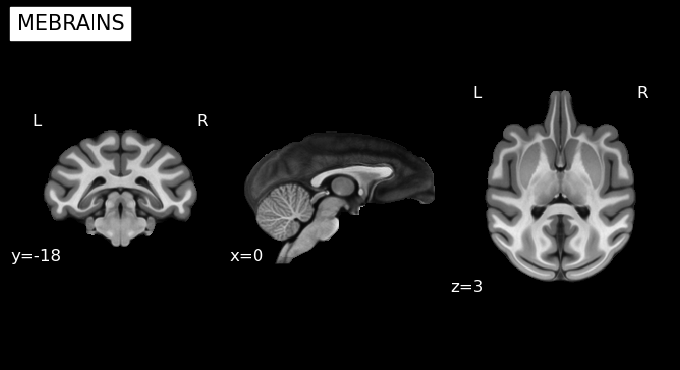

In [12]:
for name, brain,con in zip(temp_names, temp_brains, contrasts):
    if name in include_pairs_with:
        display = plotting.plot_anat(brain, display_mode='ortho', title=name, 
                  draw_cross=False, annotate=True, dim=con);
        plt.savefig(name + '_template.png'); # save png
        plt.draw()
        #display.close()

### 0d. Parallel or serial    
Registration can be a time consuming process. If you have the resources, you may opt to parallelize some of the steps. You can configure that here. Note that this will only be relevant when using orignial ANTs. FireANTs uses GPU parallellization, but of course it requires a decent GPU.

In [13]:
do_parallel = True  # Set to True for parallel processing
par_numjobs = 5     # How many parallel processes? This is only used when do_parallel is True
if do_parallel is True:
    from joblib import Parallel, delayed

## Step 1: Linear registration
* This is performed using [ANTs](http://stnava.github.io/ANTs/) **Affine** registration (12 degrees of freedom: 3 translations + 3 rotations + 3 scalings + 3 shears)
* The _antsRegistration_ function is called through its [nipype wrapper](https://nipype.readthedocs.io/en/latest/interfaces/generated/interfaces.ants/registration.html#registration).
* [Anatomy of an antsRegistration call](https://github.com/ANTsX/ANTs/wiki/Anatomy-of-an-antsRegistration-call) does a good job of explaining what the various parameters mean.

### 1a. Define function

In [ ]:
def register_linear(moving, target,
                    moving_prefix, target_prefix,
                    include_pairs_with):
    """Linearly registers moving image to target image

    Parameters
    ----------
    moving: 3D NIFTI image file
    target: 3D NIFTI image file
    moving_prefix: string
        one of the template names 
        is used in the naming of output files
    target_prefix: string
        one of the template names 
        is used in the naming of output files
    include_pairs_with: list
        list of templates to include in execution
        will only run registration if 'moving' or 'target' is on this list
        
    
    Return
    ------
    Linear transformation matrix
        file named as '{moving_prefix}_to_{target_prefix}_0GenericAffine.mat'
    Transformed image
        moving image transformed into target image space
        file named as: {moving_prefix}_in_{target_prefix}_linear.nii.gz
    """
    if moving_prefix in include_pairs_with or target_prefix in include_pairs_with: 
        rgstr = ants.registration.Registration(
               dimension=3,
               float=False,
               fixed_image=target,
               moving_image=moving,
               output_transform_prefix='{0}_to_{1}_affine_'.format(moving_prefix, target_prefix),
               output_warped_image='{0}_in_{1}_linear.nii.gz'.format(moving_prefix, target_prefix),
               initial_moving_transform_com=0,
               winsorize_lower_quantile=0.05,
               winsorize_upper_quantile=0.95,
               interpolation='Linear',
               use_histogram_matching=[True],
               transforms=['Affine'],
               transform_parameters=[(0.1,)],
               metric=['MI'],
               metric_weight=[1],
               radius_or_number_of_bins=[32],
               sampling_strategy=['Regular'],
               sampling_percentage=[0.2],
               number_of_iterations=[[1000, 500, 250, 100]],
               convergence_threshold=[1e-6],
               convergence_window_size=[10],
               shrink_factors=[[8, 4, 2, 1]],
               smoothing_sigmas=[[3, 2, 1, 0]],
               sigma_units=['vox'])
    
        rgstr.run()

### 1b. Apply function to register all unique template pairs

In [ ]:
if do_parallel: # parallel
    print('\nPerforming linear registration in parallel...')
    start_time = time.time()
    Parallel(n_jobs=par_numjobs, backend='multiprocessing')(
        delayed(register_linear)
        (brains[0],brains[1],names[0],names[1],include_pairs_with) 
        for names, brains in zip(combinations(temp_names, 2), combinations(temp_brains, 2)))
    end_time = time.time()
    print('Linear registration completed in  {0:.2f} minutes'.format((end_time - start_time)/60))
        
else: # serial
    for names, brains in zip(combinations(temp_names, 2), combinations(temp_brains, 2)):
        
        # explicit here for clarity
        mov_pref = names[0]
        targ_pref = names[1]
        mov_brain = brains[0]
        targ_brain = brains[1]
    
        print('\nLinearly registering {0} to {1} template...'.format(mov_pref, targ_pref))
        start_time = time.time()
        register_linear(mov_brain, targ_brain, mov_pref, targ_pref, include_pairs_with)
        end_time = time.time()
        print('Linear registration completed in  {0:.2f} minutes'.format((end_time - start_time)/60))

### 1c. Visualize linear registration results

In [ ]:
for names, brains in zip(combinations(temp_names, 2), combinations(temp_brains, 2)):
    if names[0] in include_pairs_with or names[1] in include_pairs_with:
        mov_pref = names[0]
        targ_pref = names[1]
        mov_brain = brains[0]
        targ_brain = brains[1]
        targ_index = temp_names.index(targ_pref)

        display = plotting.plot_anat(targ_brain, display_mode='ortho',
                            title='{0} edges on {1} volume'.format(mov_pref, targ_pref),
                            draw_cross=False, annotate=False, dim=contrasts[targ_index])
        brain = '{0}_in_{1}_linear.nii.gz'.format(mov_pref, targ_pref)
        #display.add_edges(brain)
        display.add_contours(brain)
        plt.savefig('Linear_{0}_on_{1}.png'.format(mov_pref, targ_pref))
        plt.draw()
        display.close()

## Step 2: Non-linear registration
* Symmetric Diffeomorphic ([SyN](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2276735/)) registration is performed using [ANTs](http://stnava.github.io/ANTs/).
* The starting point for this step is the transformed image from the previous (linear) step
* The _antsRegistration_ function is called through its [nipype wrapper](https://nipype.readthedocs.io/en/latest/interfaces/generated/interfaces.ants/registration.html#registration).
* [Anatomy of an antsRegistration call](https://github.com/ANTsX/ANTs/wiki/Anatomy-of-an-antsRegistration-call) does a good job of explaining what the various parameters mean.

### 2a. Define function

In [ ]:
def register_SyN(moving, target,
                 moving_prefix, target_prefix,
                 include_pairs_with):
    """Non-linearly registers moving image to target image using ANTs SyN

    Parameters
    ----------
    Same as register_linear function

    Return
    ------
    Non-linear forward warp
        file named as '{moving_prefix}_to_{target_prefix}_1Warp.nii.gz'
    Non-linear backward warp (inverse of the above)
        file named as '{moving_prefix}_to_{target_prefix}_1InverseWarp.nii.gz'
    Transformed image
        moving image transformed into target image space
        file named as: {moving_prefix}_in_{target_prefix}_linear+SyN.nii.gz
    """
    if moving_prefix in include_pairs_with or target_prefix in include_pairs_with: 
        rgstr = ants.registration.Registration(
               dimension=3,
               float=False,
               fixed_image=target,
               moving_image=moving,
               output_transform_prefix='{0}_to_{1}_'.format(moving_prefix, target_prefix),
               output_warped_image='{0}_in_{1}_linear+SyN.nii.gz'.format(moving_prefix, target_prefix),
               initial_moving_transform_com=0,
               winsorize_lower_quantile=0.05,
               winsorize_upper_quantile=0.95,
               interpolation='Linear',
               use_histogram_matching=[True],
               transforms=['SyN'],
               transform_parameters=[(0.1,)],
               metric=['CC'],
               metric_weight=[1],
               radius_or_number_of_bins=[4],
               sampling_strategy=['Regular'],
               sampling_percentage=[0.2],
               number_of_iterations=[[500, 200, 50]],
               convergence_threshold=[1e-6],
               convergence_window_size=[10],
               shrink_factors=[[8, 4, 2]],
               smoothing_sigmas=[[3, 2, 1]],
               sigma_units=['vox'])

        rgstr.run()

### 2b. Apply function to register all unique template pairs    

In [ ]:
if do_parallel: # parallel
    print('\nPerforming non-linear registration in parallel...')
    start_time = time.time()
    Parallel(n_jobs=par_numjobs, backend='multiprocessing')(
        delayed(register_SyN)
        ('{0}_in_{1}_linear.nii.gz'.format(names[0], names[1]), brains[1], names[0], names[1], include_pairs_with) 
        for names, brains in zip(combinations(temp_names, 2), combinations(temp_brains, 2)))
    end_time = time.time()
    print('Non-linear registration completed in  {0:.2f} minutes'.format((end_time - start_time)/60))
    
else: # serial
    for names, brains in zip(combinations(temp_names, 2), combinations(temp_brains, 2)):

        # explicit here for clarity
        mov_pref = names[0]
        targ_pref = names[1]
        mov_brain = '{0}_in_{1}_linear.nii.gz'.format(mov_pref, targ_pref)
        targ_brain = brains[1]
    
        print('\nNon-linearly registering {0} to {1} template...'.format(mov_pref, targ_pref))
        start_time = time.time()
        register_SyN(mov_brain, targ_brain, mov_pref, targ_pref, include_pairs_with)
        end_time = time.time()
        print('Non-linear registration completed in  {0:.2f} minutes'.format((end_time - start_time)/60))

### 2c: Visualize non-linear registration results

In [ ]:
for names, brains in zip(combinations(temp_names, 2), combinations(temp_brains, 2)):
    if names[0] in include_pairs_with or names[1] in include_pairs_with:
        mov_pref = names[0]
        targ_pref = names[1]
        targ_brain = brains[1]
        targ_index = temp_names.index(targ_pref)

        display = plotting.plot_anat(targ_brain, display_mode='ortho',
                            title='{0} edges on {1} volume'.format(mov_pref, targ_pref),
                            draw_cross=False, annotate=False, dim=contrasts[targ_index])
        brain = '{0}_in_{1}_linear+SyN.nii.gz'.format(mov_pref, targ_pref)
        #display.add_edges(brain)
        display.add_contours(brain)
        plt.savefig('Nonlinear_{0}_on_{1}.png'.format(mov_pref, targ_pref))
        plt.draw()
        display.close()

## Step 3: Derive composite warps by combining linear and non-linear steps
* This is done with the _antsApplyTransforms_ function, using its [nipype wrapper](https://nipype.readthedocs.io/en/latest/interfaces/generated/interfaces.ants/resampling.html#applytransforms).
* **Caution:** the order with which transforms are passed is akin to linear algebra notation, so first transform is applied last
* Both forward (templateA-to-templateB) and backward (templateB-to-templateA) warps are computed

### 3a. Define function

In [ ]:
def combine_transforms(moving, target,
                       moving_prefix, target_prefix,
                       include_pairs_with):

    """Combines linear transform with non-linear warp to generate a composite warp

    Parameters
    ----------
    Same as register_linear function

    Return
    ------
    Composite forward warp
        file named as '{moving_prefix}_to_{target_prefix}_CompositeWarp.nii.gz'
    Composite backward warp (inverse of the above)
        file named as '{target_prefix}_to_{moving_prefix}_CompositeWarp.nii.gz'
    """
    if moving_prefix in include_pairs_with or target_prefix in include_pairs_with: 
        forward = ants.ApplyTransforms(
                input_image=moving,
                output_image='{0}_to_{1}_CompositeWarp.nii.gz'.format(moving_prefix, target_prefix),
                reference_image=target,
                transforms=['{0}_to_{1}_1Warp.nii.gz'.format(moving_prefix, target_prefix),
                            '{0}_to_{1}_affine_0GenericAffine.mat'.format(moving_prefix, target_prefix)],
                dimension=3,
                print_out_composite_warp_file=True)
        forward.run()

        backward = ants.ApplyTransforms(
                input_image=target,
                output_image='{1}_to_{0}_CompositeWarp.nii.gz'.format(moving_prefix, target_prefix),
                reference_image=moving,
                transforms=['{0}_to_{1}_affine_0GenericAffine.mat'.format(moving_prefix, target_prefix),
                            '{0}_to_{1}_1InverseWarp.nii.gz'.format(moving_prefix, target_prefix)],
                invert_transform_flags=[True, False], # invert the linear transform
                dimension=3,
                print_out_composite_warp_file=True)

        backward.run()

### 3b. Apply function to generate all composite warp pairs

In [ ]:
if do_parallel: # parallel
    print('\nCreating composite warps in parallel...')
    start_time = time.time()
    Parallel(n_jobs=par_numjobs, backend='multiprocessing')(
        delayed(combine_transforms)
        (brains[0], brains[1], names[0], names[1], include_pairs_with) 
        for names, brains in zip(combinations(temp_names, 2), combinations(temp_brains, 2)))
    end_time = time.time()
    print('Composite warps computed in {0:.2f} minutes'.format((end_time - start_time)/60))
    
else: # serial
    for names, brains in zip(combinations(temp_names, 2), combinations(temp_brains, 2)):

        # make explicit here
        mov_pref = names[0]
        targ_pref = names[1]
        mov_brain = brains[0]
        targ_brain = brains[1]

        print('\nCreating composite warps between {0} and {1} templates...'.format(mov_pref, targ_pref))
        start_time = time.time()
        combine_transforms(mov_brain, targ_brain, mov_pref, targ_pref, include_pairs_with)
        end_time = time.time()
        print('Composite warps computed in {0:.2f} minutes'.format((end_time - start_time)/60))

### 3c. Visually assess the derived composite warp pairs
* First use the derived composite warps to transform brains in both directions

In [ ]:
for names, brains in zip(combinations(temp_names, 2), combinations(temp_brains, 2)):
    if names[0] in include_pairs_with or names[1] in include_pairs_with:
        mov_pref = names[0]
        targ_pref = names[1]
        mov_brain = brains[0]
        targ_brain = brains[1]

        forward = ants.ApplyTransforms(
                input_image=mov_brain,
                output_image='{0}_in_{1}_composite.nii.gz'.format(mov_pref, targ_pref),
                reference_image=targ_brain,
                transforms=['{0}_to_{1}_CompositeWarp.nii.gz'.format(mov_pref, targ_pref)],
                dimension=3)
        backward = ants.ApplyTransforms(
                input_image=targ_brain,
                output_image='{1}_in_{0}_composite.nii.gz'.format(mov_pref, targ_pref),
                reference_image=mov_brain,
                transforms=['{1}_to_{0}_CompositeWarp.nii.gz'.format(mov_pref, targ_pref)],
                dimension=3)

        print('\nTransforming {0} into {1} space...'.format(mov_pref, targ_pref))
        start_time = time.time()
        forward.run()
        end_time = time.time()
        print('Transformation complete in {0:.2f} minutes'.format((end_time - start_time)/60))
        print('Transforming {1} into {0} space...'.format(mov_pref, targ_pref))
        start_time = time.time()
        backward.run()
        end_time = time.time()
        print('Transformation complete in {0:.2f} minutes'.format((end_time - start_time)/60))

* Then, overlay the transformed (by composite warps) brains on target brains for visualization
* two plots (forward/backward) will be generated for each template pair

In [ ]:
for names, brains in zip(combinations(temp_names, 2), combinations(temp_brains, 2)):
    if names[0] in include_pairs_with or names[1] in include_pairs_with:
        mov_pref = names[0]
        targ_pref = names[1]
        mov_brain = brains[0]
        targ_brain = brains[1]
        mov_index = temp_names.index(mov_pref)
        targ_index = temp_names.index(targ_pref)

        display = plotting.plot_anat(targ_brain, display_mode='ortho',
                            title='{0} edges on {1} volume'.format(mov_pref, targ_pref),
                            draw_cross=False, annotate=False, dim=contrasts[targ_index])
        brain = '{0}_in_{1}_composite.nii.gz'.format(mov_pref, targ_pref)
        #display.add_edges(brain)
        display.add_contours(brain)
        plt.savefig('Composite_{0}_on_{1}.png'.format(mov_pref, targ_pref))
        plt.draw()
        display.close()

        display = plotting.plot_anat(mov_brain, display_mode='ortho',
                            title='{1} edges on {0} volume'.format(mov_pref, targ_pref),
                            draw_cross=False, annotate=False, dim=contrasts[mov_index])
        brain = '{1}_in_{0}_composite.nii.gz'.format(mov_pref, targ_pref)
        #display.add_edges(brain)
        display.add_contours(brain)
        plt.savefig('Composite_{1}_on_{0}.png'.format(mov_pref, targ_pref))
        plt.draw()
        plt.show()
        display.close()

### 4. Clean-up
* Create subfolders for linear and non-linear warps, and for the warped volumes
* Put all files in sensible subfolders

In [ ]:
os.makedirs(BASE_path + "warps/linear" , exist_ok=True)
os.makedirs(BASE_path + "warps/nonlinear" , exist_ok=True)
os.makedirs(BASE_path + "warps/final" , exist_ok=True)

[os.rename(os.getcwd() + '/' + f, BASE_path + "warps/linear/" + f) for f in glob.glob('*_affine_*Affine.mat')];
[os.rename(os.getcwd() + '/' + f, BASE_path + "warps/nonlinear/" + f) for f in glob.glob('*_to_*_1Warp.nii.gz')];
[os.rename(os.getcwd() + '/' + f, BASE_path + "warps/nonlinear/" + f) for f in glob.glob('*_to_*_1InverseWarp.nii.gz')];
[os.rename(os.getcwd() + '/' + f, BASE_path + "warps/final/" + f) for f in glob.glob('*_to_*_CompositeWarp.nii.gz')];
[os.remove(f) for f in glob.glob('*Affine.mat')]; # spurious linear warps (generated by nonlinear)

os.makedirs(BASE_path + "warped_templates/linear" , exist_ok=True)
os.makedirs(BASE_path + "warped_templates/nonlinear" , exist_ok=True)
os.makedirs(BASE_path + "warped_templates/final" , exist_ok=True)

[os.rename(os.getcwd() + '/' +  f, BASE_path + "warped_templates/linear/" + f) for f in glob.glob('*_in_*linear.nii.gz')];
[os.rename(os.getcwd() + '/' +  f, BASE_path + "warped_templates/nonlinear/" + f) for f in glob.glob('*_in_*linear+SyN.nii.gz')];
[os.rename(os.getcwd() + '/' +  f, BASE_path + "warped_templates/final/" + f) for f in glob.glob('*_in_*composite.nii.gz')];

os.makedirs(BASE_path + "images/templates" , exist_ok=True)
os.makedirs(BASE_path + "images/linear_reg" , exist_ok=True)
os.makedirs(BASE_path + "images/nonlinear_reg" , exist_ok=True)
os.makedirs(BASE_path + "images/all_warp_pairs" , exist_ok=True)

[os.rename(os.getcwd() + '/' + f, BASE_path + "images/templates/" + f) for f in glob.glob('*_template.png')];
[os.rename(os.getcwd() + '/' + f, BASE_path + "images/linear_reg/" + f) for f in glob.glob('Linear*.png')];
[os.rename(os.getcwd() + '/' + f, BASE_path + "images/nonlinear_reg/" + f) for f in glob.glob('Nonlinear*.png')];
[os.rename(os.getcwd() + '/' + f, BASE_path + "images/all_warp_pairs/" + f) for f in glob.glob('Composite*.png')];

### 5. We will now create the average 'meta'-template in NMTv2.0 symmetric space (just because we can)
* Get all the templates (in NMTv2.0 sym space) & average them into a 'MetaTemplate'
* Plot the result

In [ ]:
wtp = BASE_path + "warped_templates/final/"
image_list = [NMTv20_sym_brain]
for file in os.listdir(wtp):
    if file.split('_')[2] == 'NMTv2.0-sym':
        image_list.append(wtp + file)

In [ ]:
avg = ants.AverageImages(
    dimension=3,
    output_average_image="MetaTemplate_in_NMTv2.0-sym.nii.gz",
    normalize=True,
    images=image_list
);
avg.run();

plotting.plot_anat("MetaTemplate_in_NMTv2.0-sym.nii.gz", display_mode='ortho', 
          title="MetaTemplate in NMTv2.0-sym", draw_cross=False, annotate=True, dim=con);
plt.savefig('MetaTemplate_in_NMTv2.0-sym.png')
plt.draw()

In [ ]:
os.makedirs(BASE_path + "warped_templates/metatemplate" , exist_ok=True)
[os.rename(os.getcwd() + '/' +  f, BASE_path + "warped_templates/metatemplate/" + f) for f in glob.glob('MetaTemplate*.nii.gz')];
os.makedirs(BASE_path + "images/metatemplate" , exist_ok=True)
[os.rename(os.getcwd() + '/' + f, BASE_path + "images/metatemplate/" + f) for f in glob.glob('MetaTemplate*.png')];